# Python tutorial 2021
## Example 03: Simulating the KLM trigger


The purpose of the KLM trigger is to find events with high-momentum muons and simultanously suppress cosmic muons. The  most simple  version of the KLM Trigger counts the number of layers that have got a hit and cut on the layer number.


The first step of the simulation is always to include the dependencies.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot
import py_helpers.group_apply as ga
import py_helpers.klm_helpers as klm
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In the next step we load the data from the root file. The data has been converted to plain root files to make working with them more convenient. 

In [21]:
file = uproot.open("data/peschke_210_nLayerTrigger_7_particlegun.root")
MCParticles = file["MCParticles"].pandas.df()
KLMDigits = file["KLMDigits"].pandas.df()


# provide unique ID that defines each paricle
MCParticles["particle_nr"] = range(len(MCParticles)) 
# convert momentum in angular direction

MCParticles["theta"] = np.arctan2(np.sqrt(MCParticles["px"]*MCParticles["px"]+MCParticles["py"]*MCParticles["py"]),MCParticles["pz"])
MCParticles["phi"]   = np.arctan2(MCParticles["py"],MCParticles["px"]) 

# Remove all particles that are not muons
MC_Muon = MCParticles[(MCParticles.PDG == 13)| (MCParticles.PDG == -13)] 


# KLM digits have a "section", "sub-detector" axis which can be simplified to just one axis "i_sector"
KLMDigits = klm.add_i_section(KLMDigits) 

In [22]:
MCParticles

,event_nr,px,py,pz,mass,charge,energy,index,PDG,x_production,y_production,z_production,x_Decay,y_Decay,z_Decay,particle_nr,theta,phi
entry,,,,,,,,,,,,,,,,,,
0,1,2.693851,0.805408,-4.234622,0.105658,-1.0,5.084161,1.0,13.0,0.000000,0.000000,0.000000,484.758209,214.287338,-800.000000,0,2.555457,0.290521
1,2,3.518141,3.744988,-0.769732,0.105658,-1.0,5.196720,1.0,13.0,0.000000,0.000000,0.000000,612.348328,800.000000,-147.511383,1,1.719493,0.816621
2,3,1.841940,2.955645,-2.165792,0.105658,1.0,4.102487,1.0,-13.0,0.000000,0.000000,0.000000,683.443420,800.000000,-618.970459,2,2.127154,1.013497
3,4,-0.034794,-0.097078,0.137136,0.105658,-1.0,0.201506,1.0,13.0,0.000000,0.000000,0.000000,20.217836,8.145914,157.728149,3,0.644773,-1.914945
4,4,-0.000028,-0.000209,0.000312,0.000511,-1.0,0.000635,2.0,11.0,39.761749,-23.800684,86.420937,40.024494,-23.908245,95.028519,4,0.595717,-1.703584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,9999,0.007821,2.477060,-0.841613,0.105658,1.0,2.618275,1.0,-13.0,0.000000,0.000000,0.000000,106.155106,762.110596,-200.472015,18738,1.898321,1.567639
18739,9999,0.053673,0.680520,-0.152601,0.000000,0.0,0.699482,2.0,-14.0,106.155106,762.110596,-200.472015,109.143448,800.000000,-208.968414,18739,1.790728,1.492089
18740,9999,0.006507,0.134924,-0.017955,0.000000,0.0,0.136269,3.0,12.0,106.155106,762.110596,-200.472015,107.982437,800.000000,-205.514069,18740,1.702940,1.522606


![pictures/Slide5.PNG](pictures/Slide5.PNG)


In the KLMDigits data set we can have many hits per layer, therefore we have to remove these "doublications". 

The following line allows us to remove dublicated lines. The input argument is a list with columns which need to be unique combinations. 

```python 
KLMDigits.drop_duplicates(["event_nr","sector","i_sector","layer"])
```



The next lines is a function that groups the dataframe "df" by the columns given in the 2nd argument. 
The output coulums are named by the 3rd argument. 
The 4th argument gives the function used on each group.
The 5th argument is the comumns used as input to function provided in 4th.


```python
KLMDigits_with_layer_count = ga.group_apply(
        df,
        ["event_nr","Subdetector","sector","section","i_sector"], 
        ["layer_count"] , 
        len, 
        ["layer"]
    )
```

In [24]:
KLMDigits_with_layer_count = ga.group_apply(
        KLMDigits.drop_duplicates(["event_nr","sector","i_sector","layer"]), 
        ["event_nr","Subdetector","sector","section","i_sector"], 
        ["layer_count"] , 
        len, 
        ["layer"]
    )
KLMDigits_with_layer_count

,event_nr,Subdetector,sector,section,i_sector,layer_count
0,1,2.0,1.0,1.0,3,10
1,2,1.0,2.0,0.0,2,15
2,3,1.0,2.0,0.0,2,8
3,3,2.0,1.0,1.0,3,1
4,5,2.0,2.0,1.0,3,12
...,...,...,...,...,...,...
10224,9995,2.0,1.0,2.0,0,8
10225,9997,2.0,1.0,2.0,0,2
10226,9998,1.0,8.0,1.0,1,6
10227,9999,1.0,3.0,0.0,2,15


In [28]:

config = pd.read_csv("configuration/KLM_acceptance_revers.csv", delimiter = ";")  




KLMDigits_with_accaptance = KLMDigits_with_layer_count.merge(config, on=["Subdetector","section","sector"])
MC_Muon1 = MC_Muon.merge(KLMDigits_with_accaptance,on="event_nr")
MC_Muon1

,event_nr,px,py,pz,mass,charge,energy,index,PDG,x_production,...,phi,Subdetector,sector,section,i_sector,layer_count,theta_min,theta_max,phi_min,phi_max
0,1,2.693851,0.805408,-4.234622,0.105658,-1.0,5.084161,1.0,13.0,0.0,...,0.290521,2.0,1.0,1.0,3,10,1.5,3.5,-0.5,2.0
1,2,3.518141,3.744988,-0.769732,0.105658,-1.0,5.196720,1.0,13.0,0.0,...,0.816621,1.0,2.0,0.0,2,15,1.0,3.5,0.0,1.5
2,3,1.841940,2.955645,-2.165792,0.105658,1.0,4.102487,1.0,-13.0,0.0,...,1.013497,2.0,1.0,1.0,3,1,1.5,3.5,-0.5,2.0
3,3,1.841940,2.955645,-2.165792,0.105658,1.0,4.102487,1.0,-13.0,0.0,...,1.013497,1.0,2.0,0.0,2,8,1.0,3.5,0.0,1.5
4,5,0.166624,2.229935,-2.999365,0.105658,-1.0,3.742690,1.0,13.0,0.0,...,1.496213,2.0,2.0,1.0,3,12,1.5,3.5,1.0,-2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10227,9995,-0.235899,1.192419,3.002913,0.105658,-1.0,3.241321,1.0,13.0,0.0,...,1.766106,2.0,1.0,2.0,0,8,0.0,1.5,1.5,3.5
10228,9997,-0.415278,0.625877,2.017804,0.105658,1.0,2.155661,1.0,-13.0,0.0,...,2.156613,2.0,1.0,2.0,0,2,0.0,1.5,1.5,3.5
10229,9998,0.193942,-1.738337,0.490588,0.105658,-1.0,1.819689,1.0,13.0,0.0,...,-1.459688,1.0,8.0,1.0,1,6,0.0,1.5,-1.5,0.0
10230,9999,0.007821,2.477060,-0.841613,0.105658,1.0,2.618275,1.0,-13.0,0.0,...,1.567639,1.0,3.0,0.0,2,15,1.0,3.5,0.8,2.2


In [31]:
def isInRange(x , x_min, x_max):
    return (x_min < x_max) & (x_min < x) & (x < x_max) | \
            ((x_min >= x_max) &((x_min < x) | (x < x_max )))

MC_Muon2 =MC_Muon1[\
        (isInRange(MC_Muon1.theta,  MC_Muon1.theta_min,  MC_Muon1.theta_max))& \
        (isInRange(MC_Muon1.phi,    MC_Muon1.phi_min,    MC_Muon1.phi_max)) \
    ]
    
#MC_Muon2 = MC_Muon1[(MC_Muon1.theta_min < MC_Muon1.theta)&(MC_Muon1.theta < MC_Muon1.theta_max) & (MC_Muon1.phi_min < MC_Muon1.phi)&(MC_Muon1.phi < MC_Muon1.phi_max)]
MC_Muon2 = MC_Muon2.drop(["theta_min","theta_max","phi_min","phi_max" ],axis=1)


Text(0, 0.5, '#')

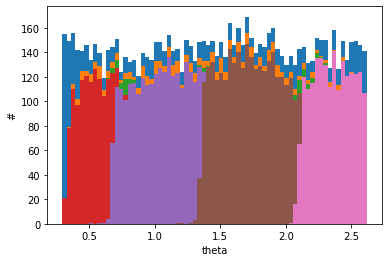

In [9]:
h0 = plt.hist( MC_Muon.drop_duplicates("particle_nr").theta,bins=70)
h1 = plt.hist( MC_Muon1.drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon2.drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon2[MC_Muon2.i_sector==klm.i_sector_EKLM_ForwardSection].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon2[MC_Muon2.i_sector==klm.i_sector_BKLM_ForwardSection].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon2[MC_Muon2.i_sector==klm.i_sector_BKLM_BackwardSection].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon2[MC_Muon2.i_sector==klm.i_sector_EKLM_BackwardSection].drop_duplicates("particle_nr").theta,bins=h0[1])
plt.xlabel("theta")
plt.ylabel("#")


Text(0, 0.5, '#')

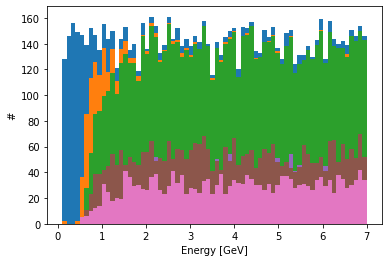

In [32]:
h0 = plt.hist( MC_Muon.drop_duplicates("particle_nr").energy,bins=70)
h1 = plt.hist( MC_Muon1.drop_duplicates("particle_nr").energy,bins=h0[1])
h1 = plt.hist( MC_Muon2.drop_duplicates("particle_nr").energy,bins=h0[1])
h1 = plt.hist( MC_Muon2[MC_Muon2.i_sector==klm.i_sector_EKLM_ForwardSection].drop_duplicates("particle_nr").energy,bins=h0[1])
h1 = plt.hist( MC_Muon2[MC_Muon2.i_sector==klm.i_sector_BKLM_ForwardSection].drop_duplicates("particle_nr").energy,bins=h0[1])
h1 = plt.hist( MC_Muon2[MC_Muon2.i_sector==klm.i_sector_BKLM_BackwardSection].drop_duplicates("particle_nr").energy,bins=h0[1])
h1 = plt.hist( MC_Muon2[MC_Muon2.i_sector==klm.i_sector_EKLM_BackwardSection].drop_duplicates("particle_nr").energy,bins=h0[1])
plt.xlabel("Energy [GeV]")
plt.ylabel("#")

Text(0, 0.5, '#')

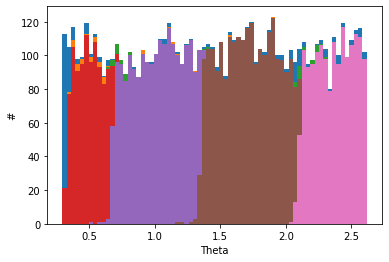

In [11]:
energy_min = 2

h0 = plt.hist( MC_Muon[(MC_Muon.energy>energy_min)].drop_duplicates("particle_nr").theta,bins=70)
h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon2[(MC_Muon2.energy>energy_min)].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon2[(MC_Muon2.energy>energy_min)&(MC_Muon2.i_sector==klm.i_sector_EKLM_ForwardSection)].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon2[(MC_Muon2.energy>energy_min)&(MC_Muon2.i_sector==klm.i_sector_BKLM_ForwardSection)].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon2[(MC_Muon2.energy>energy_min)&(MC_Muon2.i_sector==klm.i_sector_BKLM_BackwardSection)].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon2[(MC_Muon2.energy>energy_min)&(MC_Muon2.i_sector==klm.i_sector_EKLM_BackwardSection)].drop_duplicates("particle_nr").theta,bins=h0[1])
plt.xlabel("Theta")
plt.ylabel("#")

Text(0, 0.5, '#')

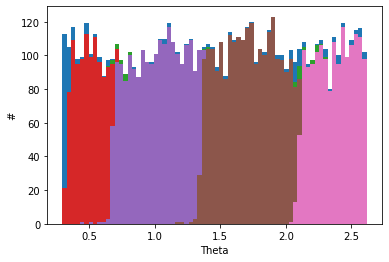

In [12]:
energy_min = 2

h0 = plt.hist( MC_Muon[(MC_Muon.energy>energy_min)].drop_duplicates("particle_nr").theta,bins=70)
h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)&(MC_Muon1.i_sector==klm.i_sector_EKLM_ForwardSection)].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)&(MC_Muon1.i_sector==klm.i_sector_BKLM_ForwardSection)].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)&(MC_Muon1.i_sector==klm.i_sector_BKLM_BackwardSection)].drop_duplicates("particle_nr").theta,bins=h0[1])
h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)&(MC_Muon1.i_sector==klm.i_sector_EKLM_BackwardSection)].drop_duplicates("particle_nr").theta,bins=h0[1])
plt.xlabel("Theta")
plt.ylabel("#")

Text(0, 0.5, '#')

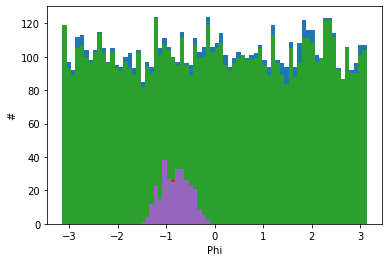

In [13]:
energy_min = 2
sector = 8
h0 = plt.hist( MC_Muon[(MC_Muon.energy>energy_min)].drop_duplicates("particle_nr").phi,bins=70)
h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)].drop_duplicates("particle_nr").phi,bins=h0[1])
h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)].drop_duplicates("particle_nr").phi,bins=h0[1])
h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)&(MC_Muon1.i_sector==klm.i_sector_BKLM_ForwardSection)&(MC_Muon1.sector == sector)].drop_duplicates("particle_nr").phi,bins=h0[1])
h1 = plt.hist( MC_Muon2[(MC_Muon2.energy>energy_min)&(MC_Muon2.i_sector==klm.i_sector_BKLM_ForwardSection)&(MC_Muon2.sector == sector)].drop_duplicates("particle_nr").phi,bins=h0[1])
#h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)&(MC_Muon1.i_sector==klm.i_sector_BKLM_ForwardSection)].drop_duplicates("particle_nr").theta,bins=h0[1])
#h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)&(MC_Muon1.i_sector==klm.i_sector_BKLM_ForwardSection)].drop_duplicates("particle_nr").theta,bins=h0[1])
#h1 = plt.hist( MC_Muon1[(MC_Muon1.energy>energy_min)&(MC_Muon1.i_sector==klm.i_sector_BKLM_ForwardSection)].drop_duplicates("particle_nr").theta,bins=h0[1])
plt.xlabel("Phi")
plt.ylabel("#")

Text(0, 0.5, '#')

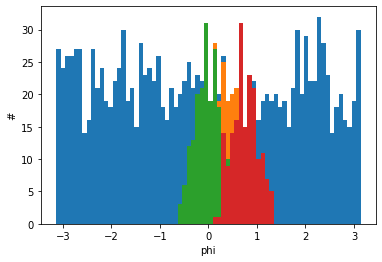

In [36]:
energy_min = 2
sector = 8
theta_min = 0.8
theta_max = 1.3
h0 = plt.hist( MC_Muon[(MC_Muon.theta>theta_min)&(MC_Muon.theta<theta_max)&(MC_Muon.energy>energy_min)].drop_duplicates("particle_nr").phi,bins=70)
sector_1 = MC_Muon1[(MC_Muon1.theta>theta_min)&(MC_Muon1.theta<theta_max)&(MC_Muon1.i_sector==1)&(MC_Muon1.sector==1)&(MC_Muon1.energy>energy_min)].drop_duplicates("particle_nr")
sector_2 = MC_Muon1[(MC_Muon1.theta>theta_min)&(MC_Muon1.theta<theta_max)&(MC_Muon1.i_sector==1)&(MC_Muon1.sector==2)&(MC_Muon1.energy>energy_min)].drop_duplicates("particle_nr")                    
sector_1_or_2 = MC_Muon1[(MC_Muon1.theta>theta_min)&(MC_Muon1.theta<theta_max)&(MC_Muon1.i_sector==1)&( ( MC_Muon1.sector==1)| (MC_Muon1.sector==2))&(MC_Muon1.energy>energy_min)].drop_duplicates("particle_nr")                    
h1_2 = plt.hist( sector_1_or_2.phi,bins=h0[1])
h1 = plt.hist( sector_1.phi,bins=h0[1])
h2 = plt.hist( sector_2.phi,bins=h0[1])
plt.xlabel("phi")
plt.ylabel("#")


Text(0, 0.5, 'Efficiency')

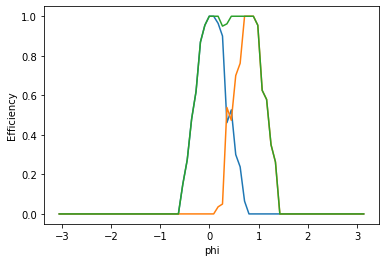

In [37]:
h1_normal = h1[0]/h0[0]
h2_normal = h2[0]/h0[0]
h1_2_normal = h1_2[0]/h0[0]

plt.plot(h0[1][1:], h1_normal)
plt.plot(h0[1][1:], h2_normal)
plt.plot(h0[1][1:], h1_2_normal)
plt.xlabel("phi")
plt.ylabel("Efficiency")

Text(0, 0.5, '#')

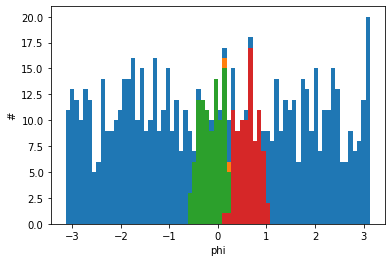

In [38]:
energy_min = 2
sector = 8
theta_min = 0.8
theta_max = 1.3
layer_min = 8


h0 = plt.hist( MC_Muon[(MC_Muon.PDG == 13)&(MC_Muon.theta>theta_min)&(MC_Muon.theta<theta_max)&(MC_Muon.energy>energy_min)].drop_duplicates("particle_nr").phi,bins=70)
sector_1 = MC_Muon1[(MC_Muon1.PDG == 13)&(MC_Muon1.layer_count>layer_min)&(MC_Muon1.theta>theta_min)&(MC_Muon1.theta<theta_max)&(MC_Muon1.i_sector==1)&(MC_Muon1.sector==1)&(MC_Muon1.energy>energy_min)].drop_duplicates("particle_nr")
sector_2 = MC_Muon1[(MC_Muon1.PDG == 13)&(MC_Muon1.layer_count>layer_min)&(MC_Muon1.theta>theta_min)&(MC_Muon1.theta<theta_max)&(MC_Muon1.i_sector==1)&(MC_Muon1.sector==2)&(MC_Muon1.energy>energy_min)].drop_duplicates("particle_nr")                    
sector_1_or_2 = MC_Muon1[(MC_Muon1.PDG == 13)&(MC_Muon1.layer_count>layer_min)&(MC_Muon1.theta>theta_min)&(MC_Muon1.theta<theta_max)&(MC_Muon1.i_sector==1)&( ( MC_Muon1.sector==1)| (MC_Muon1.sector==2))&(MC_Muon1.energy>energy_min)].drop_duplicates("particle_nr")                    
h1_2 = plt.hist( sector_1_or_2.phi,bins=h0[1])
h1 = plt.hist( sector_1.phi,bins=h0[1])
h2 = plt.hist( sector_2.phi,bins=h0[1])

plt.xlabel("phi")
plt.ylabel("#")

Text(0, 0.5, 'Efficiency')

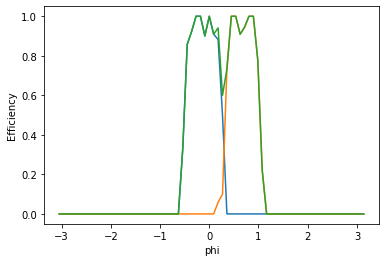

In [17]:
h1_normal = h1[0]/h0[0]
h2_normal = h2[0]/h0[0]
h1_2_normal = h1_2[0]/h0[0]

plt.plot(h0[1][1:], h1_normal)
plt.plot(h0[1][1:], h2_normal)
plt.plot(h0[1][1:], h1_2_normal)
plt.xlabel("phi")
plt.ylabel("Efficiency")